# Declare and read data

In [6]:
import chardet

with open('Sample - Superstore.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [8]:
import pandas as pd
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# EDA

## Basic EDA

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print("Duplicate Rows",df[dups])
    plt.figure(figsize=(10,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

A Overview about the Superstore dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sal

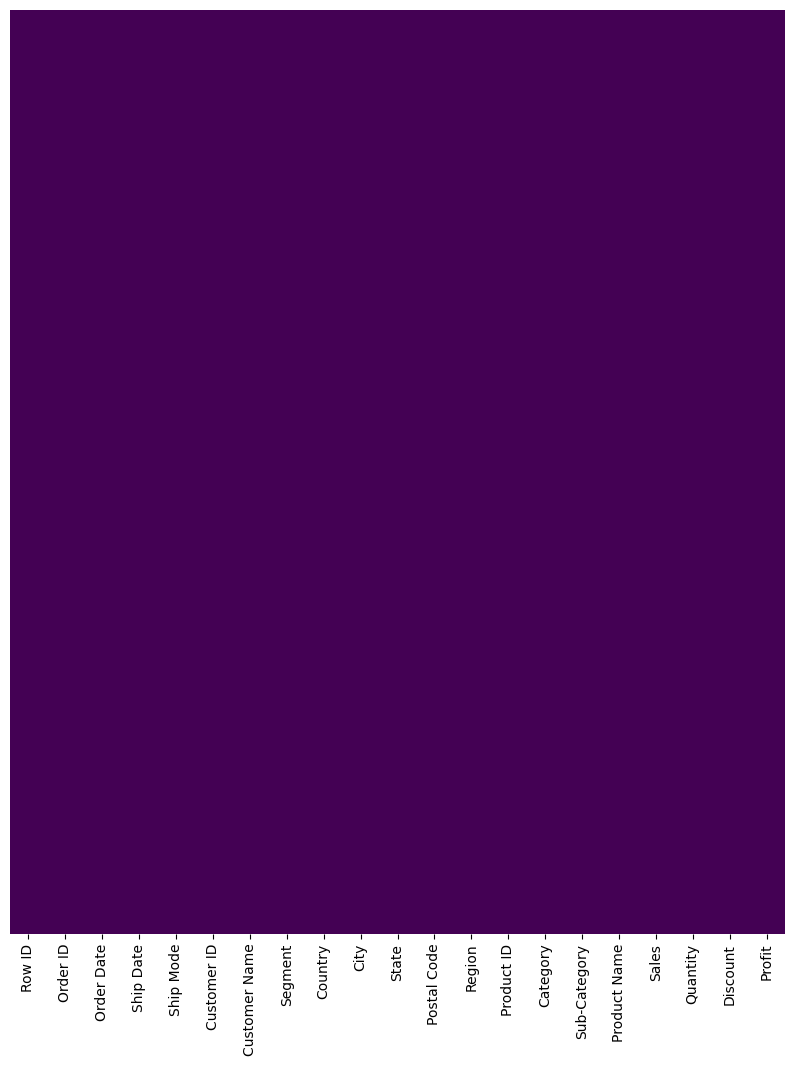

In [27]:
dataoverview(df, 'A Overview about the Superstore dataset')

## Save data

In [9]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [10]:
df.to_csv('cleaning_data.csv', index=False)

## Plot charts to understand the data

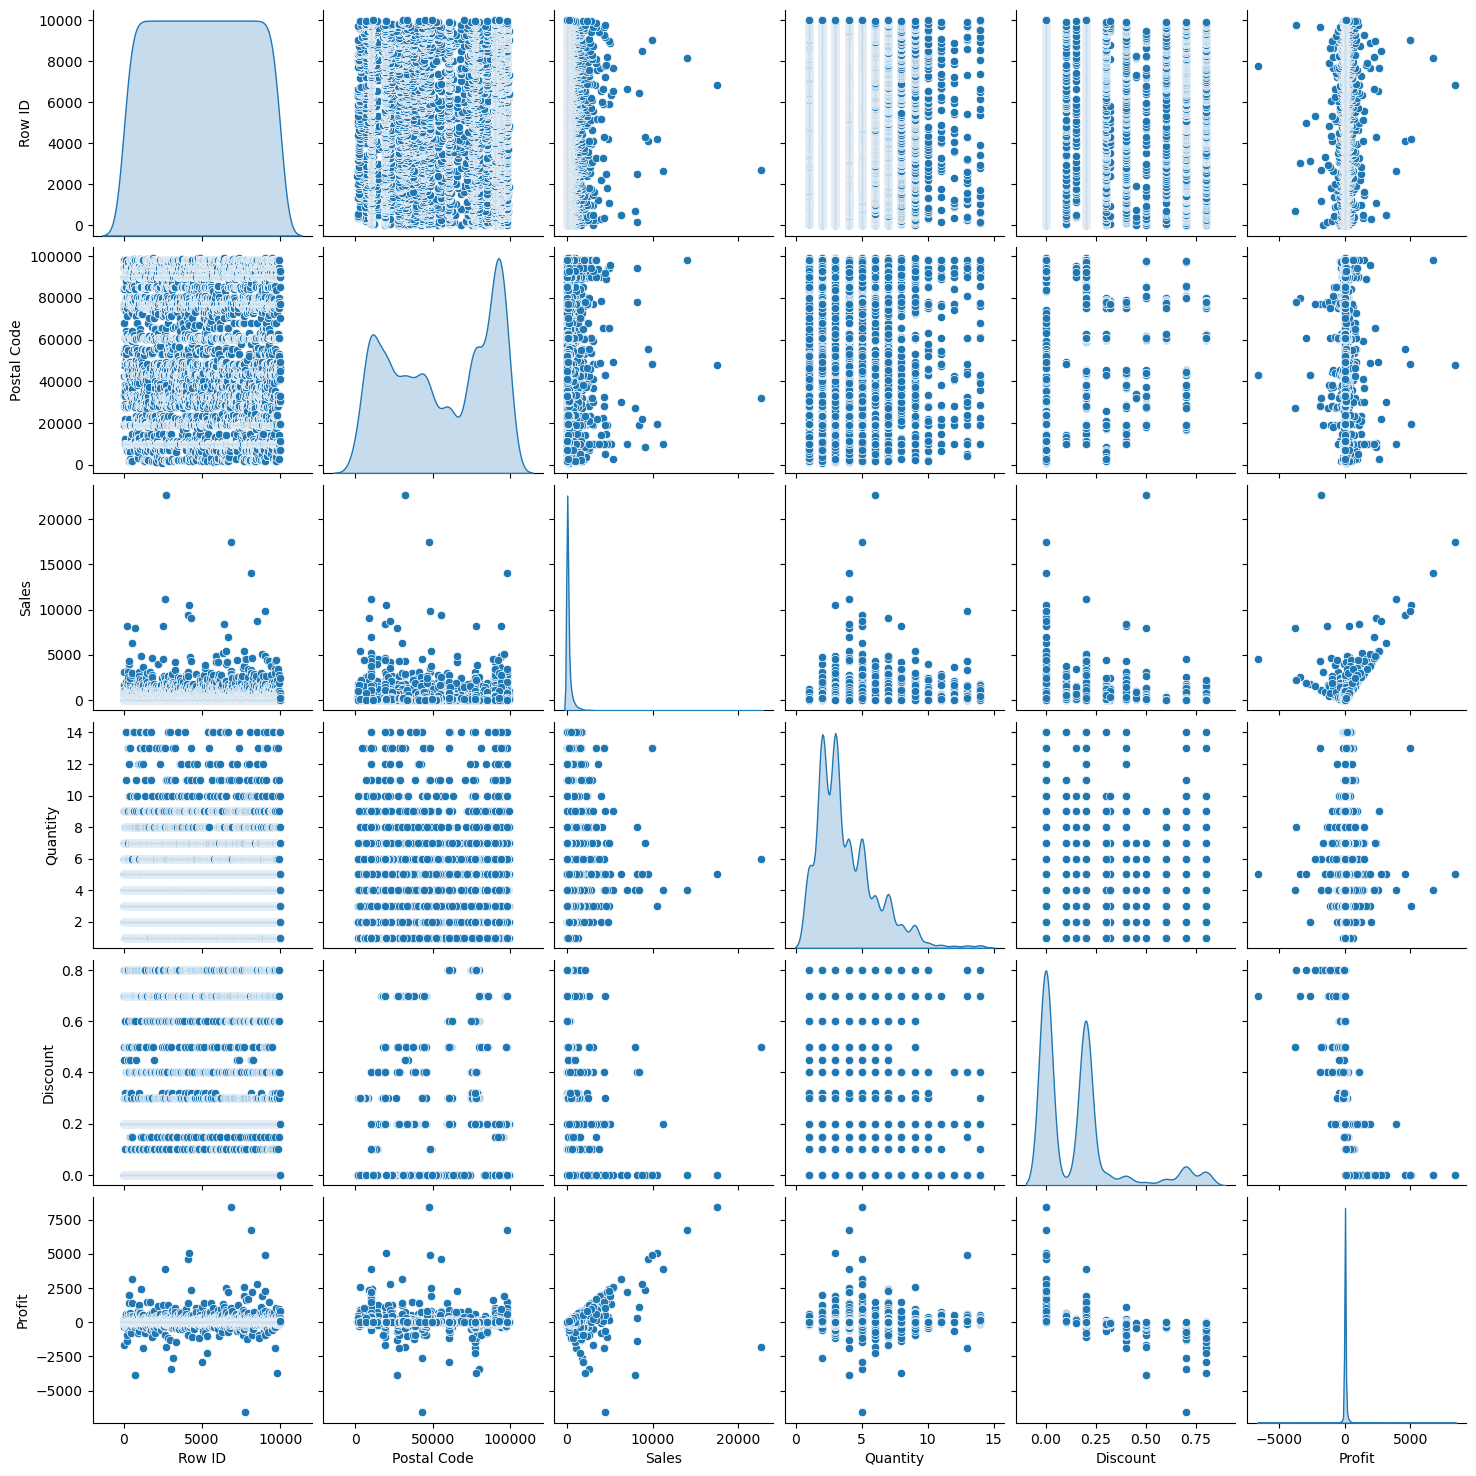

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
def eda_dataset(df):
    #Separating columns to be visualized
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      + df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()

eda_dataset(df)

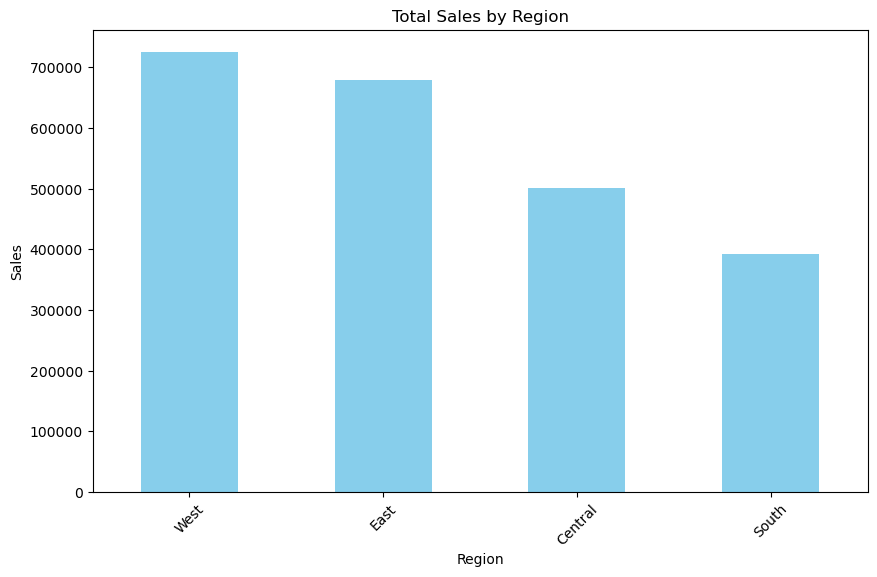

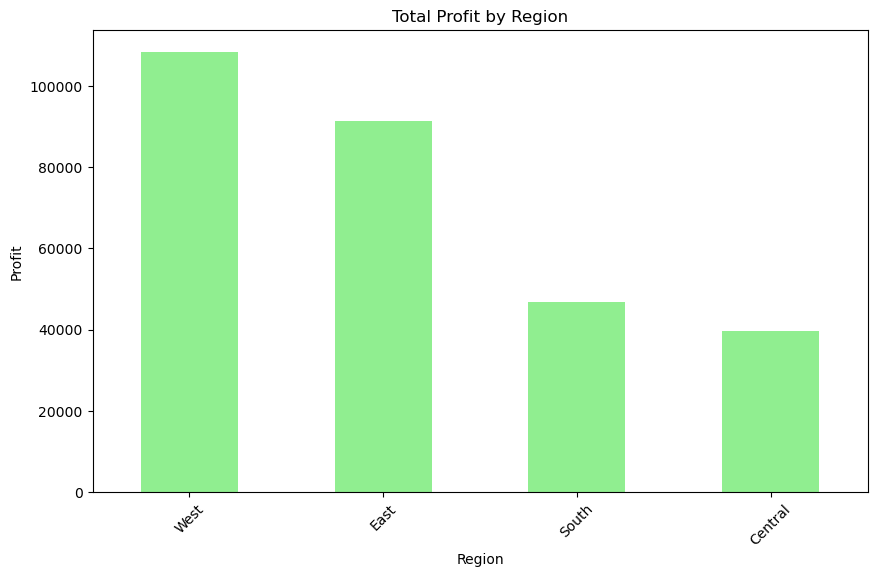

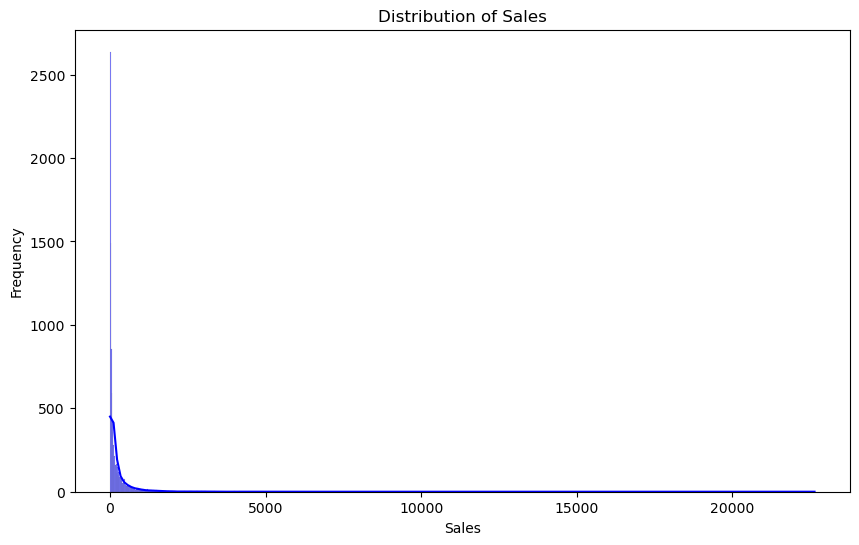

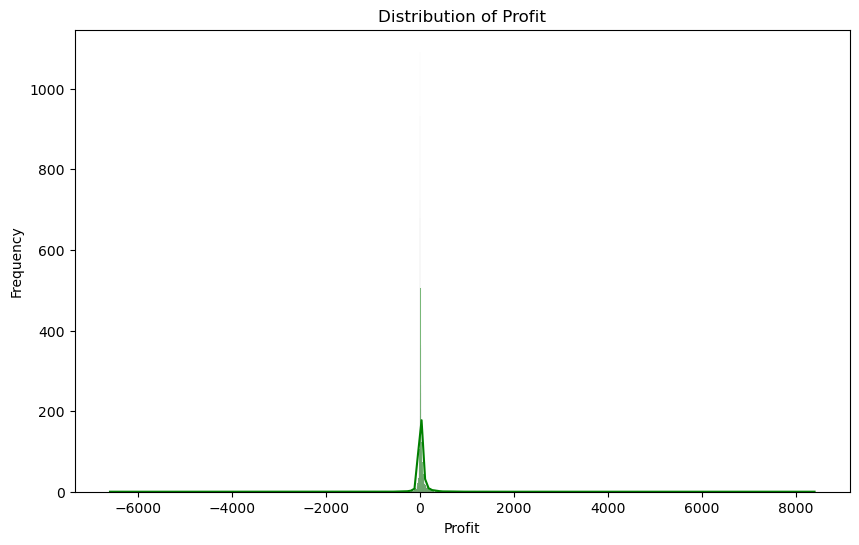

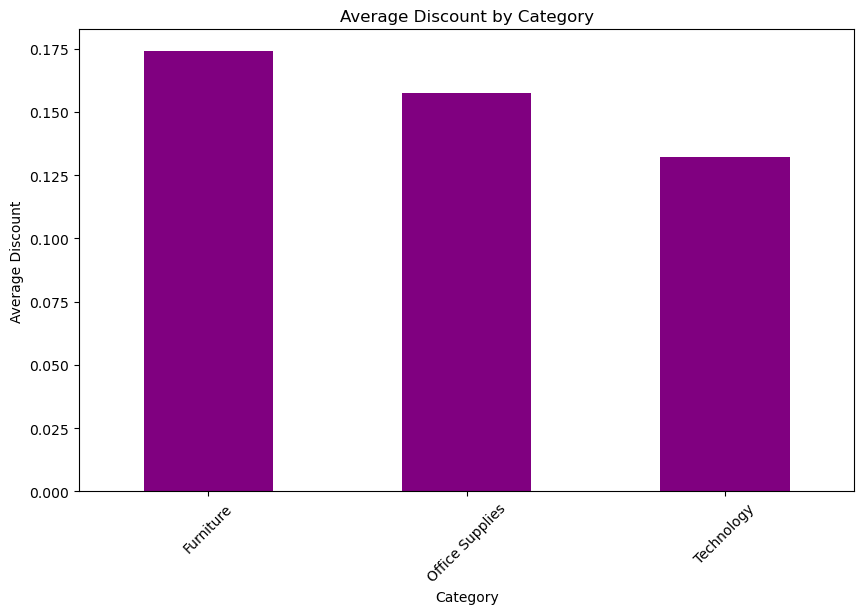

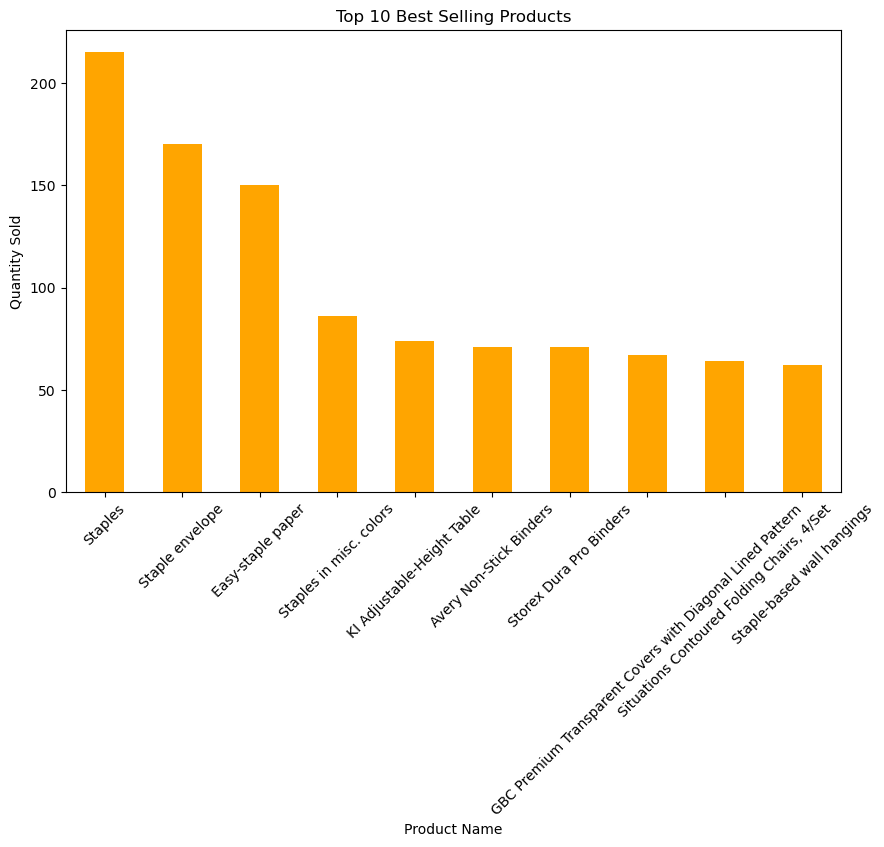

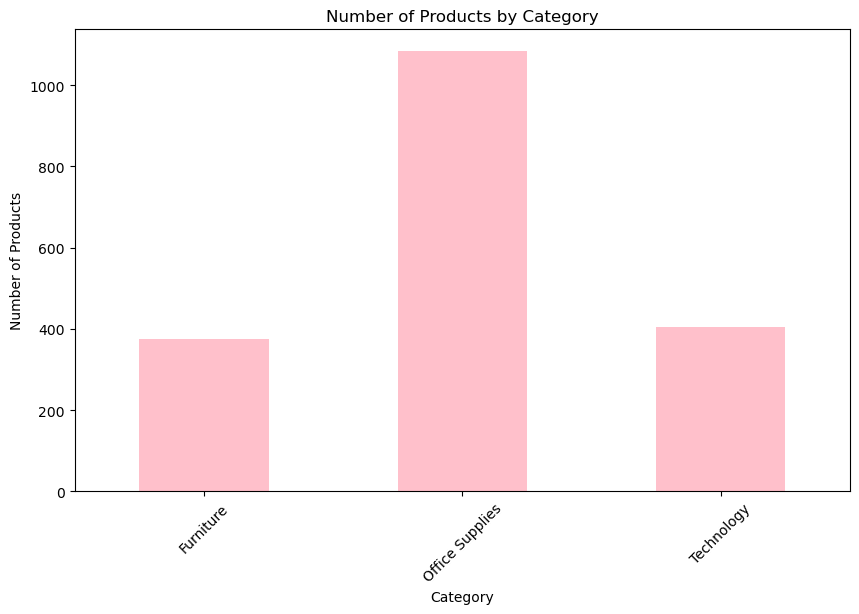

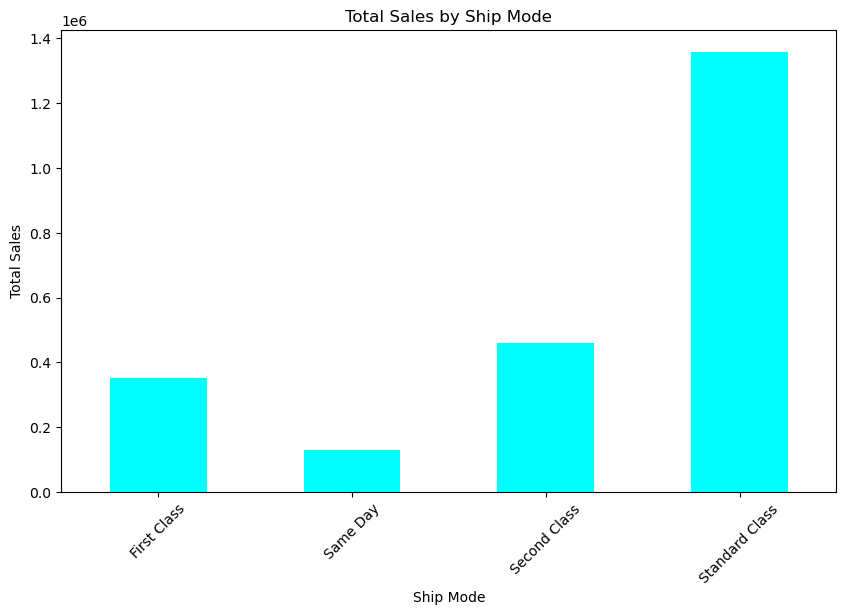

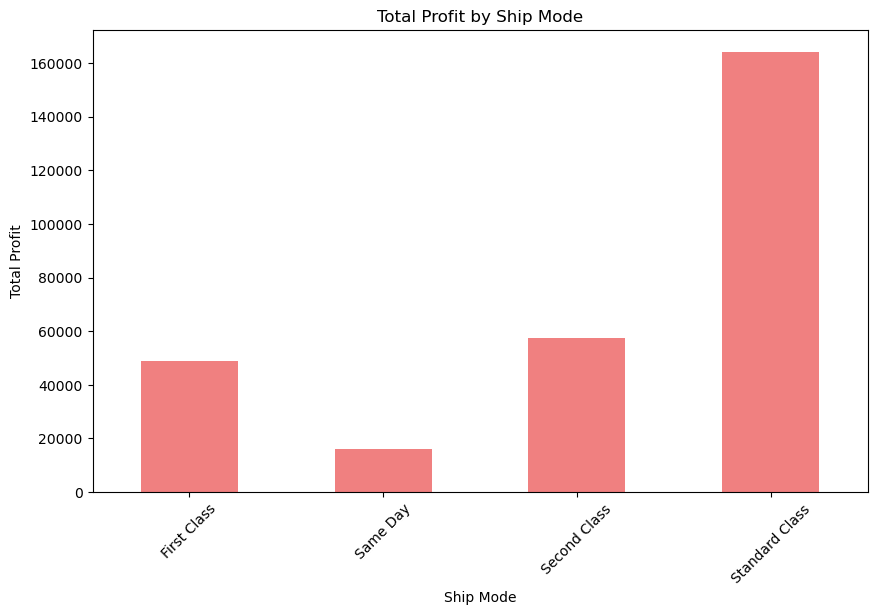

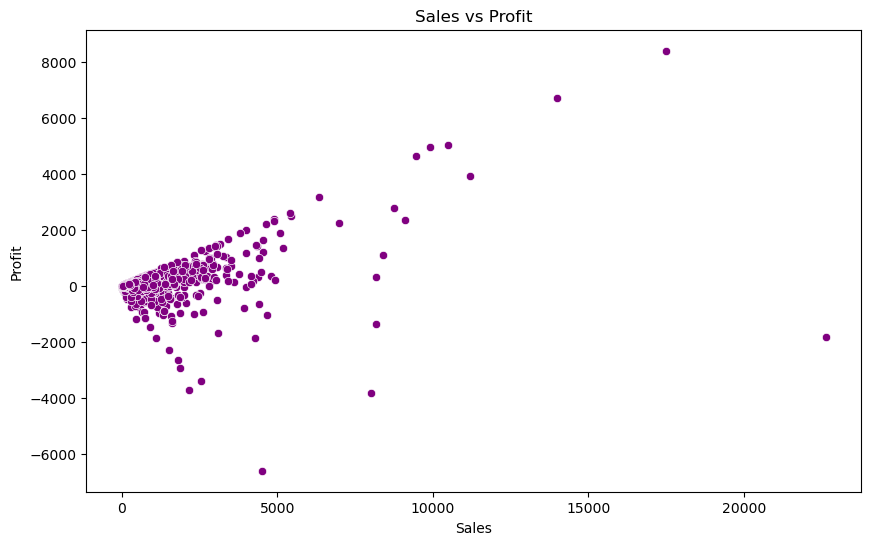

In [13]:
# 1. Biểu đồ Doanh thu theo Khu vực (Region)
region_summary = df.groupby('Region')[['Sales']].sum().sort_values('Sales', ascending=False)
plt.figure(figsize=(10, 6))
region_summary['Sales'].plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# 2. Biểu đồ Lợi nhuận theo Khu vực (Region)
region_summary = df.groupby('Region')[['Profit']].sum().sort_values('Profit', ascending=False)
plt.figure(figsize=(10, 6))
region_summary['Profit'].plot(kind='bar', color='lightgreen')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

# 3. Biểu đồ Phân bố Doanh thu
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# 4. Biểu đồ Phân bố Lợi nhuận
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], kde=True, color='green')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# 5. Biểu đồ Tỷ lệ Giảm giá theo Danh mục Sản phẩm
avg_discount = df.groupby('Category')['Discount'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_discount.plot(kind='bar', color='purple')
plt.title('Average Discount by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)
plt.show()

# 6. Biểu đồ Top 10 Sản phẩm Bán Chạy Nhất
top_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# 7. Biểu đồ Phân bổ Sản phẩm theo Danh mục
product_category = df.groupby('Category')['Product ID'].nunique()
plt.figure(figsize=(10, 6))
product_category.plot(kind='bar', color='pink')
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# 8. Biểu đồ Doanh thu theo Tình trạng Giao hàng (Ship Mode)
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum()
plt.figure(figsize=(10, 6))
ship_mode_sales.plot(kind='bar', color='cyan')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# 9. Biểu đồ Lợi nhuận theo Phương thức Giao hàng (Ship Mode)
ship_mode_profit = df.groupby('Ship Mode')['Profit'].sum()
plt.figure(figsize=(10, 6))
ship_mode_profit.plot(kind='bar', color='lightcoral')
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

# 10. Biểu đồ Mối quan hệ giữa Doanh thu và Lợi nhuận
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, color='purple')
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


## Correlation Heatmap

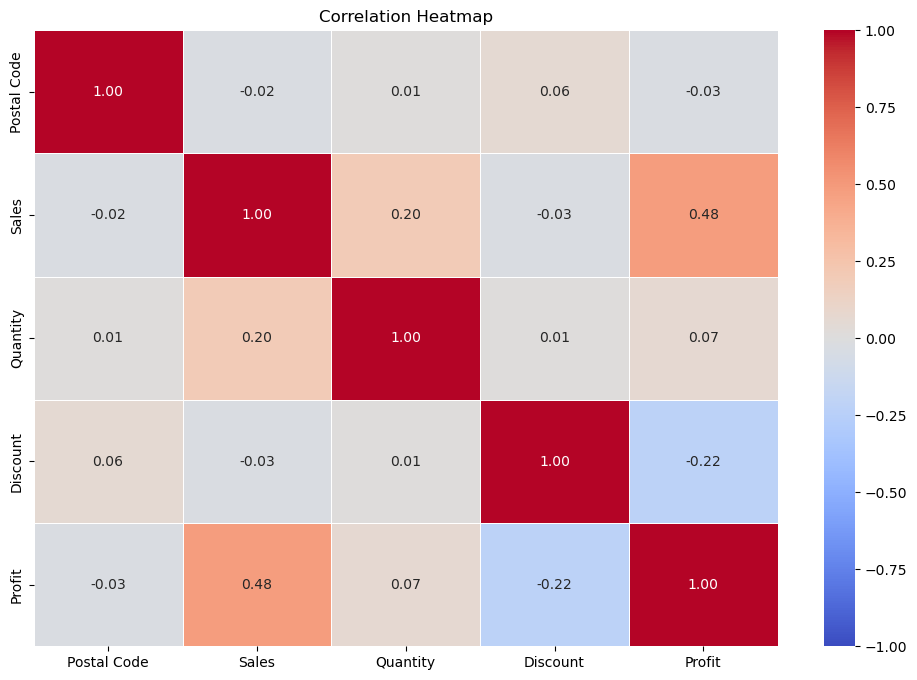

In [15]:
# Loại bỏ cột 'Row ID' và chỉ lấy các cột số (numeric)
df_without_row_id = df.drop(columns=['Row ID'])
numeric_cols = df_without_row_id.select_dtypes(include=['float64', 'int64'])

# Tính toán ma trận tương quan
corr_matrix = numeric_cols.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()